# Module 1 - Data Load / Display / Normalization

In this module you will learn how to load a dicom image utilizing  pydicom and create datasets that can be used with machine learning algorithms. The basic features we will consider are intensity based and originate from multiple acquisition types. 

if you get an error on this statement, you need to install the library:
pip install pydicom

### Step 1: Load basic python libraries 

In [1]:
%matplotlib notebook
import os 
import dicom as pydicom # library to load dicom images 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.colors import ListedColormap
import csv
from pandas.tools.plotting import scatter_matrix


### Step 2: Load the three type of image availble. 

- T1w pre-contrast
- T2
- FLAIR 
- T1w post-contrast 

The goal is to  create a 4D iamge that contains all four 2d slices we will use in our example

In [2]:
CurrentDir= os.getcwd()

# Print current directory
print (CurrentDir)

# Get parent direcotry 
print(os.path.abspath(os.path.join(CurrentDir, os.pardir)))

# Create the file paths. The images are contained in a subfolder called Data. 
PostName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data",  'Post.dcm')  )
PreName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'Pre.dcm') )
FLAIRName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'FLAIR.dcm') )
T2Name =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'T2.dcm') )

# read Pre in--we assume that all images are same x,y dims
Pre = pydicom.read_file(PreName)
xdim = (int) (Pre.Rows)
ydim = (int) (Pre.Columns)


# Printing the dimensions of an image 
print ('Dimensions')
print (xdim,ydim)
# make space in a numpy array for the images
ArrayDicom = np.zeros((xdim, ydim, 4), dtype=Pre.pixel_array.dtype)
# copy Pre pixels into z=0
ArrayDicom[:, :, 0] = Pre.pixel_array
# Post
Post = pydicom.read_file(PostName)
ArrayDicom[:, :, 1] = Post.pixel_array
# T2
T2 = pydicom.read_file(T2Name)
ArrayDicom[:, :, 2] = T2.pixel_array
#FLAIR
FLAIR = pydicom.read_file(FLAIRName)
ArrayDicom[:, :, 3] = FLAIR.pixel_array  
print ("Data Loaded")

/home/pan0s/Dropbox/MachineLearningForMedicalImages/notebooks
/home/pan0s/Dropbox/MachineLearningForMedicalImages
Dimensions
256 256
Data Loaded


### Create traing set

We assume the following labels. 

> NAWM=1

> GM=2

> CSF=3

> Air=4
    

In [3]:
NAWM = 0
GM = 1
CSF = 2
AIR = 3
TUMOR = 4
# each tissue has x1, y1, x2, y2 as rectangle in image that represents that tissue
Tissues = np.zeros((5, 2, 2), dtype=np.int32)
Tissues[NAWM][0][0] = 145 # we measured the location of these tissues
Tissues[NAWM][0][1] = 68
Tissues[NAWM][1][0] = 157
Tissues[NAWM][1][1] = 74

Tissues[GM][0][0] = 166 # we measured the location of these tissues
Tissues[GM][0][1] = 58
Tissues[GM][1][0] = 175
Tissues[GM][1][1] = 62

Tissues[CSF][0][0] = 105 # we measured the location of these tissues
Tissues[CSF][0][1] = 148
Tissues[CSF][1][0] = 120
Tissues[CSF][1][1] = 154

Tissues[AIR][0][0] = 1 # we measured the location of these tissues
Tissues[AIR][0][1] = 1
Tissues[AIR][1][0] = 10
Tissues[AIR][1][1] = 10

Tissues[TUMOR][0][0] = 65 # we measured the location of these tissues
Tissues[TUMOR][0][1] = 130
Tissues[TUMOR][1][0] = 74
Tissues[TUMOR][1][1] = 139


#### Plot the images 

<IPython.core.display.Javascript object>


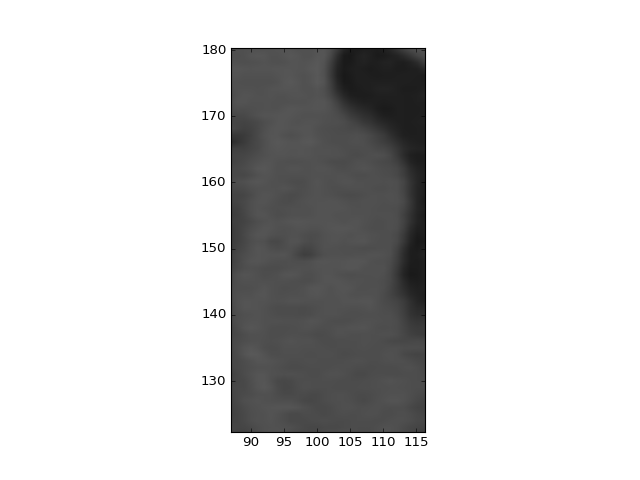

In [4]:
plt.figure()
plt.imshow(np.flipud(Pre.pixel_array),cmap='gray')
plt.contour(Tissues[NAWM], colors='k', origin='image')
plt.axis([0,256,0,256])
plt.show()

### Create dataset

In [5]:
# Create classes
ClassNAWMpost=np.asarray(ArrayDicom[Tissues[NAWM][0][0]:Tissues[NAWM][1][0],Tissues[NAWM][0][1]:Tissues[NAWM][1][1],0])
ClassNAWMpret=np.asarray(ArrayDicom[Tissues[NAWM][0][0]:Tissues[NAWM][1][0],Tissues[NAWM][0][1]:Tissues[NAWM][1][1],1])
ClassNAWMT2=np.asarray(ArrayDicom[Tissues[NAWM][0][0]:Tissues[NAWM][1][0],Tissues[NAWM][0][1]:Tissues[NAWM][1][1],2])
ClassNAWMFLAIR=np.asarray(ArrayDicom[Tissues[NAWM][0][0]:Tissues[NAWM][1][0],Tissues[NAWM][0][1]:Tissues[NAWM][1][1],3])
ClassTUMORpost=np.asarray(ArrayDicom[Tissues[TUMOR][0][0]:Tissues[TUMOR][1][0],Tissues[TUMOR][0][1]:Tissues[TUMOR][1][1],0])
ClassTUMORpret=np.asarray(ArrayDicom[Tissues[TUMOR][0][0]:Tissues[TUMOR][1][0],Tissues[TUMOR][0][1]:Tissues[TUMOR][1][1],1])
ClassTUMORT2=np.asarray(ArrayDicom[Tissues[TUMOR][0][0]:Tissues[TUMOR][1][0],Tissues[TUMOR][0][1]:Tissues[TUMOR][1][1],2])
ClassTUMORFLAIR=np.asarray(ArrayDicom[Tissues[TUMOR][0][0]:Tissues[TUMOR][1][0],Tissues[TUMOR][0][1]:Tissues[TUMOR][1][1],3])
ClassAIRpost=np.asarray(ArrayDicom[Tissues[AIR][0][0]:Tissues[AIR][1][0],Tissues[AIR][0][1]:Tissues[AIR][1][1],0])
ClassAIRpret=np.asarray(ArrayDicom[Tissues[AIR][0][0]:Tissues[AIR][1][0],Tissues[AIR][0][1]:Tissues[AIR][1][1],1])
ClassAIRT2=np.asarray(ArrayDicom[Tissues[AIR][0][0]:Tissues[AIR][1][0],Tissues[AIR][0][1]:Tissues[AIR][1][1],2])
ClassAIRFLAIR=np.asarray(ArrayDicom[Tissues[AIR][0][0]:Tissues[AIR][1][0],Tissues[AIR][0][1]:Tissues[AIR][1][1],3])
ClassCSFpost=np.asarray(ArrayDicom[Tissues[CSF][0][0]:Tissues[CSF][1][0],Tissues[CSF][0][1]:Tissues[CSF][1][1],0])
ClassCSFpret=np.asarray(ArrayDicom[Tissues[CSF][0][0]:Tissues[CSF][1][0],Tissues[CSF][0][1]:Tissues[CSF][1][1],1])
ClassCSFT2=np.asarray(ArrayDicom[Tissues[CSF][0][0]:Tissues[CSF][1][0],Tissues[CSF][0][1]:Tissues[CSF][1][1],2])
ClassCSFFLAIR=np.asarray(ArrayDicom[Tissues[CSF][0][0]:Tissues[CSF][1][0],Tissues[CSF][0][1]:Tissues[CSF][1][1],3])
ClassGMpost=np.asarray(ArrayDicom[Tissues[GM][0][0]:Tissues[GM][1][0],Tissues[GM][0][1]:Tissues[GM][1][1],0])
ClassGMpret=np.asarray(ArrayDicom[Tissues[GM][0][0]:Tissues[GM][1][0],Tissues[GM][0][1]:Tissues[GM][1][1],1])
ClassGMT2=np.asarray(ArrayDicom[Tissues[GM][0][0]:Tissues[GM][1][0],Tissues[GM][0][1]:Tissues[GM][1][1],2])
ClassGMFLAIR=np.asarray(ArrayDicom[Tissues[GM][0][0]:Tissues[GM][1][0],Tissues[GM][0][1]:Tissues[GM][1][1],3])
ClassAIRpost=np.asarray(ArrayDicom[Tissues[AIR][0][0]:Tissues[AIR][1][0],Tissues[AIR][0][1]:Tissues[AIR][1][1],0])
ClassAIRpret=np.asarray(ArrayDicom[Tissues[AIR][0][0]:Tissues[AIR][1][0],Tissues[AIR][0][1]:Tissues[AIR][1][1],1])
ClassAIRT2=np.asarray(ArrayDicom[Tissues[AIR][0][0]:Tissues[AIR][1][0],Tissues[AIR][0][1]:Tissues[AIR][1][1],2])
ClassAIRFLAIR=np.asarray(ArrayDicom[Tissues[AIR][0][0]:Tissues[AIR][1][0],Tissues[AIR][0][1]:Tissues[AIR][1][1],3])
print (np.asarray(ClassNAWMpost).dtype)
# Save the data to CSV using pandas
print ('Saving the data to a pandas dataframe and subsequnetly to a csv')
datasetcomplete=dict(GMpost=ClassGMpost.reshape(-1).tolist(),GMpre=ClassGMpret.reshape(-1).tolist(),GMT2=ClassGMT2.reshape(-1).tolist(),GMFLAIR=ClassGMFLAIR.reshape(-1).tolist(),CSFpost=ClassCSFpost.reshape(-1).tolist(),CSFpre=ClassCSFpret.reshape(-1).tolist(),CSFT2=ClassCSFT2.reshape(-1).tolist(),CSFFLAIR=ClassCSFFLAIR.reshape(-1).tolist(),AIRpost=ClassAIRpost.reshape(-1).tolist(),AIRpre=ClassAIRpret.reshape(-1).tolist(),AIRT2=ClassAIRT2.reshape(-1).tolist(),AIRFLAIR=ClassAIRFLAIR.reshape(-1).tolist(),NAWMpost=ClassNAWMpost.reshape(-1).tolist(),NAWMpre=ClassNAWMpret.reshape(-1).tolist(),NAWMT2=ClassNAWMT2.reshape(-1).tolist(),NAWMFLAIR=ClassNAWMFLAIR.reshape(-1).tolist(),TUMORpost=ClassTUMORpost.reshape(-1).tolist(),TUMORpre=ClassTUMORpret.reshape(-1).tolist(),TUMORT2=ClassTUMORT2.reshape(-1).tolist(),TUMORFLAIR=ClassTUMORFLAIR.reshape(-1).tolist())
datapd=pd.DataFrame.from_dict(datasetcomplete,orient='index')
# print (datapd)
datapd=datapd.transpose()
# datapd=pd.DataFrame(dict([ (k,Series(v)) for k,v in datasetcomplete.iteritems() ]))
datapd.to_csv('DataExample.csv',index=False)


int16
Saving the data to a pandas dataframe and subsequnetly to a csv


### Create some scatter plots

<IPython.core.display.Javascript object>


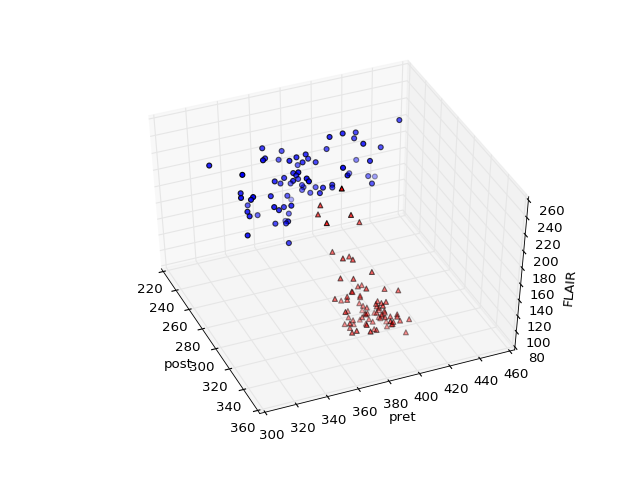

In [6]:
# Display Tumor vs NAWM
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ClassNAWMpost.reshape(-1), ClassNAWMpret.reshape(-1), ClassNAWMFLAIR.reshape(-1))
ax.scatter(ClassTUMORpost.reshape(-1), ClassTUMORpret.reshape(-1), ClassTUMORFLAIR.reshape(-1), c='r', marker='^')
ax.set_xlabel('post')
ax.set_ylabel('pret')
ax.set_zlabel('FLAIR')
plt.show()


## Describe the data 

In [7]:
# descriptions
print(datapd.describe())

        TUMORpost      AIRT2     CSFpost       CSFT2       GMpre    CSFFLAIR  \
count   81.000000  81.000000   90.000000   90.000000   36.000000   90.000000   
mean   317.074074   3.975309  317.066667  245.633333  310.388889  145.922222   
std     12.992092   4.819168   12.018525   31.151839   39.873570   12.712223   
min    277.000000   0.000000  278.000000  197.000000  170.000000  114.000000   
25%    312.000000   0.000000  310.250000  223.000000  303.250000  137.000000   
50%    320.000000   2.000000  318.000000  241.000000  315.500000  146.000000   
75%    325.000000   7.000000  324.750000  261.750000  335.000000  156.000000   
max    340.000000  22.000000  342.000000  335.000000  365.000000  172.000000   

          TUMORT2    TUMORpre   NAWMFLAIR  TUMORFLAIR     GMFLAIR      GMpost  \
count   81.000000   81.000000   72.000000   81.000000   36.000000   36.000000   
mean   191.543210  387.839506  197.805556  116.555556  122.055556  208.750000   
std     39.509825    9.491387   18.0

<IPython.core.display.Javascript object>


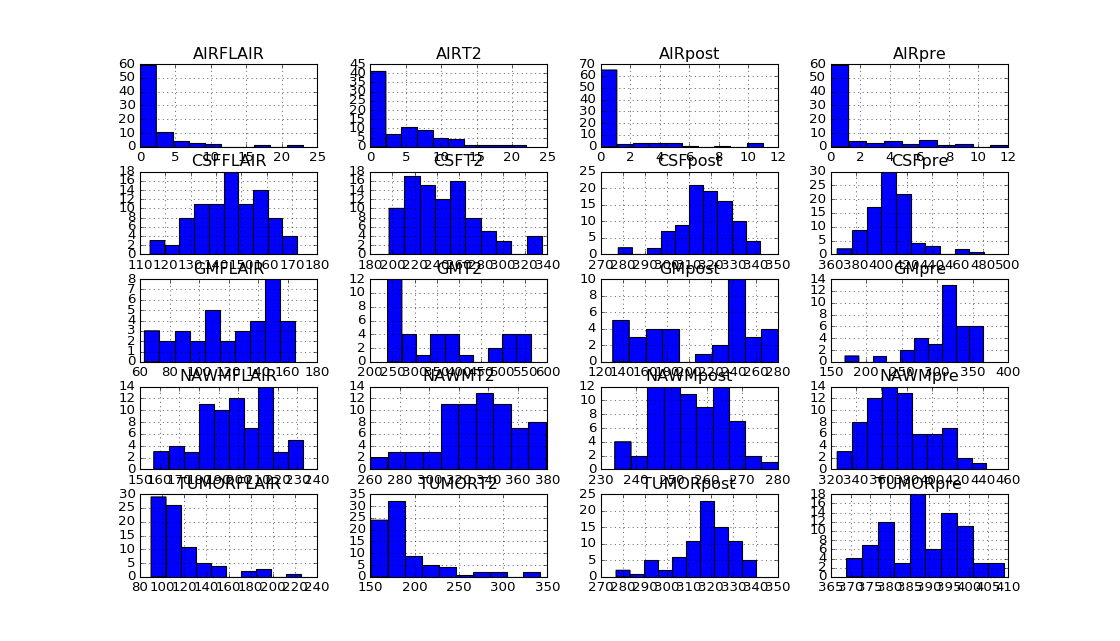

In [8]:
# histograms
datapd.hist()
plt.show()


<IPython.core.display.Javascript object>


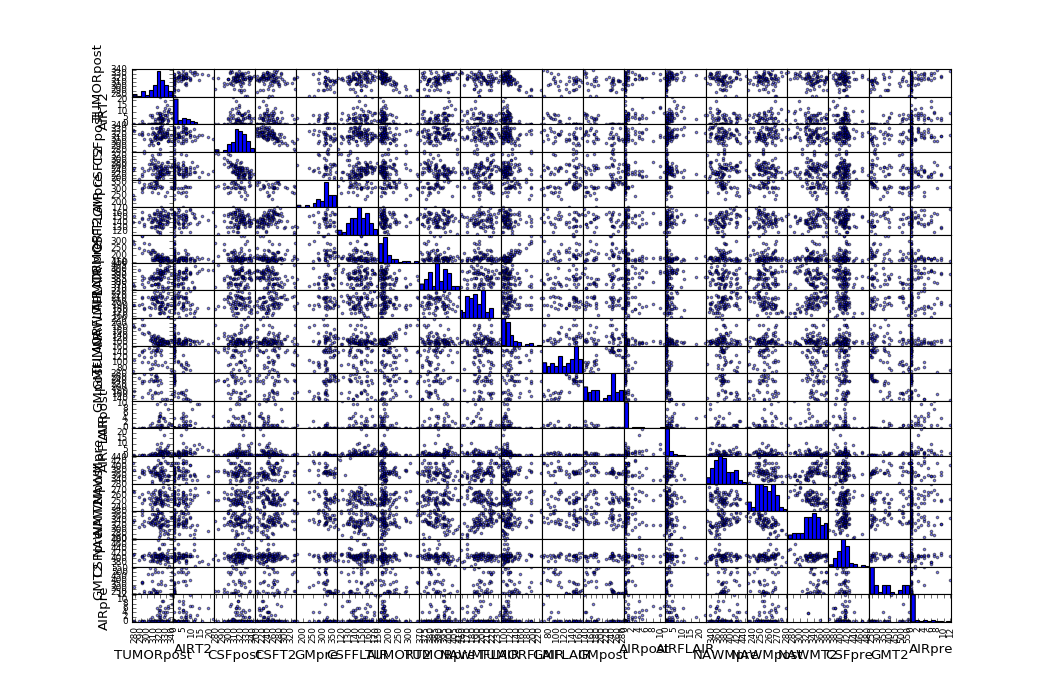

In [9]:
# scatter plot matrix
scatter_matrix(datapd)
plt.show()